# Market generator

In [9]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import datetime

import base
import market_generator

## Load monthly paths

In [291]:
import importlib
importlib.reload(market_generator)

<module 'market_generator' from '../src/market_generator.py'>

In [292]:
# ^GSPC is S&P 500.
ticker = "^GSPC"
ticker2="^VIX"
MG = market_generator.MarketGenerator(ticker, ticker2, start=datetime.date(2000, 1, 1),
                                      freq="W", sig_order=None)

logsig  (992,)
logsig  (991, 4)
logsig  (991, 4)
conds  (992,)
conds  (991, 5)
conds  (991, 4)


../src/market_generator.py:93: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.orig_logsig = np.array([np.diff(np.log(path[::2, 1].astype(np.float64))) for path in self.windows])
../src/market_generator.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.c = np.array([path[::2, 1] for path in self.windows2])


## Plot paths

In [163]:
print(MG.logsigs[:5])
print(MG.conditions[:5])
print(len(MG.windows))

[[0.28446674 0.60023364 0.62485141 0.58216905 0.17492165 0.22453738
  0.21026536 0.17469605]
 [0.32341656 0.63292506 0.49336381 0.47068585 0.14593468 0.20735854
  0.19306403 0.17525416]
 [0.4032713  0.60139289 0.51508408 0.26533766 0.20829203 0.23347038
  0.21318344 0.20022926]
 [0.43127961 0.62869938 0.61861878 0.49124548 0.22073524 0.24085728
  0.21456569 0.17888183]
 [0.44134812 0.48963255 0.56685602 0.32011406 0.19019287 0.20306383
  0.21118685 0.19367154]]
[0.23078534 0.17469605 0.17525416 0.20022926 0.17888183]
992


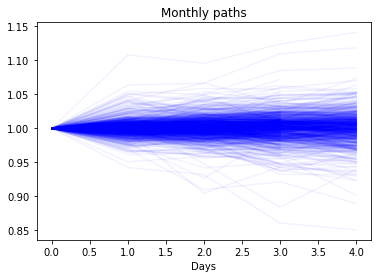

In [6]:
for path in MG.windows:
    returns = path[::2, 1] / path[0, 1]
    plt.plot(returns, "b", alpha=0.05)

plt.title("Monthly paths")
plt.xlabel("Days")
plt.show()

## Train generative model

In [325]:
MG.train(n_epochs=20000)

## Generate

In [266]:
samps=1
#generated = np.array([MG.generate(cond) for cond in MG.conditions])
generated = MG.generate(np.asarray([MG.conditions[0]]), n_samples=samps, normalised=True)
generated

array([[0.4282502 , 0.7277861 , 0.590345  , 0.42526358, 0.24539661,
        0.27423096, 0.23636073, 0.21001777]], dtype=float32)

In [285]:
a=MG.generate(np.asarray([MG.conditions[0]]), normalised=True)
np.asarray([a[-1]]).shape

(1,)

In [326]:
weeks=13
path=200
sim_cvae=MG.sim(MG.conditions[0], weeks, path)

0
0.21023655
1
0.20997667
2
0.18050608
3
0.18210962
4
0.18366316
5
0.19615161
6
0.1958023
7
0.1941888
8
0.14261934
9
0.17484209
10
0.12374073
11
0.12605742
12
0.0881629
0
0.1458041
1
0.14990881
2
0.14249885
3
0.14720342
4
0.11770713
5
0.12123972
6
0.10935858
7
0.14111483
8
0.16219732
9
0.15866292
10
0.15477845
11
0.14950752
12
0.16511863
0
0.14049551
1
0.15325189
2
0.21475491
3
0.19420746
4
0.198571
5
0.19844434
6
0.21826243
7
0.23180106
8
0.21926174
9
0.19138008
10
0.19545645
11
0.2592634
12
0.17173979
0
0.18346831
1
0.13018698
2
0.12429905
3
0.10702357
4
0.12395176
5
0.13970855
6
0.1267519
7
0.14145681
8
0.14585942
9
0.13186473
10
0.15233904
11
0.15689182
12
0.1974332
0
0.20784914
1
0.23689255
2
0.19117928
3
0.21543014
4
0.21009487
5
0.28218064
6
0.31284124
7
0.2757184
8
0.2938319
9
0.3116154
10
0.3170665
11
0.29791677
12
0.2789054
0
0.31095785
1
0.3682673
2
0.33883113
3
0.29064447
4
0.2718854
5
0.24600974
6
0.22227061
7
0.2531358
8
0.22453597
9
0.20244583
10
0.1519787
11
0.17597175


9
0.30079997
10
0.27025744
11
0.27531332
12
0.28124633
0
0.20908114
1
0.23252663
2
0.23968226
3
0.27596176
4
0.22114655
5
0.3146181
6
0.28455478
7
0.27202785
8
0.2956062
9
0.2835931
10
0.3349504
11
0.3310182
12
0.39320198
0
0.37832725
1
0.27893317
2
0.30885208
3
0.29054725
4
0.29910207
5
0.2830757
6
0.24315974
7
0.31092018
8
0.3144807
9
0.36827454
10
0.36284566
11
0.45180503
12
0.39213163
0
0.33673257
1
0.28542882
2
0.3052721
3
0.307468
4
0.25217932
5
0.23246232
6
0.25098294
7
0.2681381
8
0.33407342
9
0.38381496
10
0.24224198
11
0.22248083
12
0.24291992
0
0.28781313
1
0.27166325
2
0.3041401
3
0.31886747
4
0.34749258
5
0.32376018
6
0.30269468
7
0.29380938
8
0.33235803
9
0.31861022
10
0.30166557
11
0.22685423
12
0.2629003
0
0.2979768
1
0.2835703
2
0.27002764
3
0.22803739
4
0.22272968
5
0.18370226
6
0.1676786
7
0.14541143
8
0.14684296
9
0.17541078
10
0.15191835
11
0.1774846
12
0.15510204
0
0.17745024
1
0.14766717
2
0.14602426
3
0.12772831
4
0.10162607
5
0.08854616
6
0.11298078
7
0.1723877

3
0.2380349
4
0.23821458
5
0.22647128
6
0.20974419
7
0.18126583
8
0.23401827
9
0.19012341
10
0.16762993
11
0.15181497
12
0.15021557
0
0.19512632
1
0.19087762
2
0.1431841
3
0.13838333
4
0.1300801
5
0.13217646
6
0.14332646
7
0.1361754
8
0.19579205
9
0.167781
10
0.13968712
11
0.12242442
12
0.10092446
0
0.0830577
1
0.10709554
2
0.10885134
3
0.119140655
4
0.16124392
5
0.15113938
6
0.11943239
7
0.119805485
8
0.11600745
9
0.08868745
10
0.09794477
11
0.12922898
12
0.13691932
0
0.122677624
1
0.13087085
2
0.095745414
3
0.08987582
4
0.15267158
5
0.107874066
6
0.14882675
7
0.1858322
8
0.21380928
9
0.21654907
10
0.1965993
11
0.19573754
12
0.15728822
0
0.17600828
1
0.18632492
2
0.21889418
3
0.19404486
4
0.2289576
5
0.25142694
6
0.22425717
7
0.2202434
8
0.22104278
9
0.21876392
10
0.28811237
11
0.3307016
12
0.35542756
0
0.43884894
1
0.46862915
2
0.52239424
3
0.46298876
4
0.4901499
5
0.47515422
6
0.4718065
7
0.47688878
8
0.3710934
9
0.3871424
10
0.48703983
11
0.48208788
12
0.4415654
0
0.41231865
1
0.36

6
0.11044362
7
0.1007261
8
0.15683883
9
0.10488203
10
0.09666255
11
0.09717584
12
0.08075592
0
0.12272641
1
0.140046
2
0.12697515
3
0.11982763
4
0.11890164
5
0.09935647
6
0.1686778
7
0.21046975
8
0.20739114
9
0.26790714
10
0.2804199
11
0.24971935
12
0.2528667
0
0.27781594
1
0.34048563
2
0.2808501
3
0.31841266
4
0.2843582
5
0.22131589
6
0.22623128
7
0.18395668
8
0.19248015
9
0.21385375
10
0.20199773
11
0.223182
12
0.18229485
0
0.28541696
1
0.31796724
2
0.39258754
3
0.3054564
4
0.22430375
5
0.24845925
6
0.20759091
7
0.20619056
8
0.21981102
9
0.21830559
10
0.20435816
11
0.21042228
12
0.21635264
0
0.20271838
1
0.18228078
2
0.16266105
3
0.2498841
4
0.2380873
5
0.23302373
6
0.20185855
7
0.27987564
8
0.30946597
9
0.28286773
10
0.2913483
11
0.42049617
12
0.40687633
0
0.3283123
1
0.309785
2
0.31888723
3
0.3991161
4
0.33709505
5
0.28688553
6
0.27371368
7
0.21085435
8
0.1900878
9
0.16739574
10
0.16532707
11
0.15235922
12
0.18565977
0
0.19391808
1
0.21484452
2
0.15451202
3
0.15077665
4
0.10975605


In [295]:
sim_cvae.shape

(13, 4, 10)

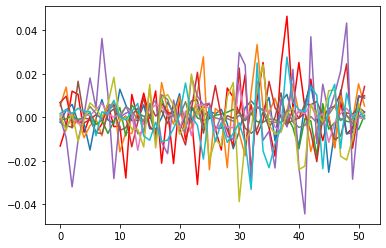

In [327]:
plt.figure()
plt.plot(MG.orig_logsig[1:14,:4].reshape(-1,1), color="r")
for i in range(10):
    j=np.random.randint(0,path)
    plt.plot(sim_cvae[:,:,j].reshape(-1,1))

In [315]:
np.std(cvae_ret[:,:,0].reshape(-1,1))

0.009927894963083708

In [301]:
np.std(MG.orig_logsig[1:14,:4].reshape(-1,1))

0.014418376728050592

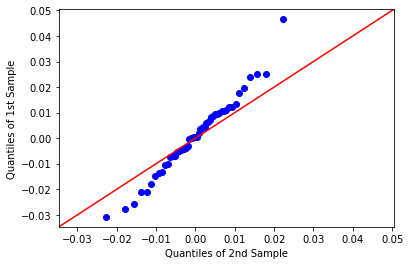

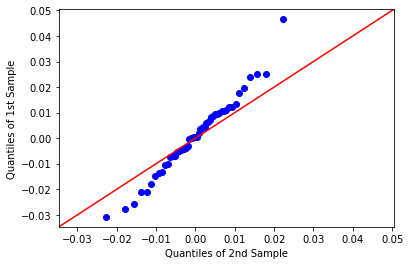

In [328]:
from statsmodels.graphics.gofplots import qqplot_2samples
#gen_mean=np.mean(sim_cvae[:,:,0].reshape(), axis=1)
mean=np.zeros((13*4,1))
for i in range(path):
    tmp=sim_cvae[:,:,i].reshape(-1,1)
    tmp.sort(axis=0)
    mean=mean+tmp
mean=mean/path
    
    
    
qqplot_2samples(MG.orig_logsig[1:14,:4].reshape(1,-1), mean.reshape(1,-1), line="45")

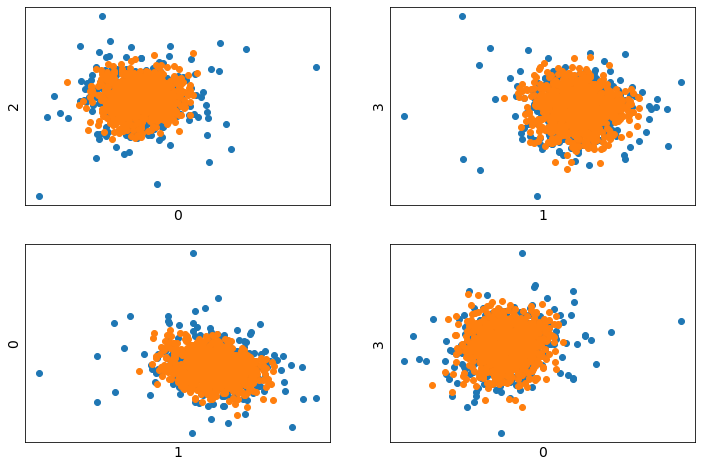

In [203]:
PROJECTIONS = [(0, 2), (1, 3), (1, 0), (0, 3)]

plt.figure(figsize=(12, 8))
for i, projection in enumerate(PROJECTIONS):
    plt.subplot(2, 2, i + 1)

    plt.scatter(MG.logsigs[:, projection[0]], MG.logsigs[:, projection[1]],
                label="Real data")
    plt.scatter(generated2[:, projection[0]], generated2[:, projection[1]],
               label="Generated")
    plt.xlabel(projection[0], fontsize=14)
    plt.ylabel(projection[1], fontsize=14)
    plt.xticks([])
    plt.yticks([])
    #plt.legend()
    
plt.show()

## Validation: two-sample statistical test

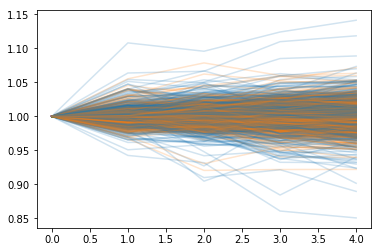

In [15]:
paths_generated = np.exp(MG.orig_logsig.cumsum(axis=1))
paths_orig = np.exp(generated.cumsum(axis=1))
for p1, p2 in zip(paths_generated, paths_orig):
    plt.plot(np.r_[1., p1], "C0", alpha=0.2)
    plt.plot(np.r_[1., p2], "C1", alpha=0.2)
    
    
plt.show()

In [16]:
from utils.leadlag import leadlag
import process_discriminator
import iisignature

order = 4
sigs1 = np.array([np.r_[1., iisignature.sig(leadlag(p), order)] for p in tqdm(paths_generated[:-1])])
sigs2 = np.array([np.r_[1., iisignature.sig(leadlag(p), order)] for p in tqdm(paths_orig)])

100%|██████████| 818/818 [00:00<00:00, 10600.02it/s]


In [17]:
import importlib
importlib.reload(process_discriminator)

<module 'process_discriminator' from '../src/process_discriminator.py'>

In [18]:
res = process_discriminator.test(sigs1, sigs2, order=order, compute_sigs=False,
                                 confidence_level=0.9999)

print("Are the generated and real distributions DIFFERENT? {}".format(res))


Are the generated and real distributions DIFFERENT? False


In [ ]:
from ipywidgets import IntProgress
